<a href="https://colab.research.google.com/github/sakshisinghh28/Breast-Cancer-Detection-using-CNN/blob/main/breastcancerdetectionusingcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Find the direction of dataset
import numpy as np
import pandas as pd
import os

In [ ]:
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random # for visualization
print('Libraries Imported')

Libraries Imported


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/My Drive/archive.zip" -d "/content/drive/My Drive/MIAS"

In [ ]:
path = '/content/drive/My Drive/MIAS/all-mias/'

In [ ]:
print("reading dataframe")
info=pd.read_csv("/content/drive/My Drive/MIAS/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [ ]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [ ]:
info.dropna(subset = ["SEVERITY"], inplace=True)

info.reset_index(inplace = True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [ ]:
info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info

,level_0,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
4,5,12,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...,...,...
117,118,281,mdb274,F,MISC,M,127.0,505.0,123.0
118,119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
119,120,319,mdb312,F,MISC,B,240.0,263.0,20.0
120,121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [ ]:
# taking the images filenames in to dictionary
ids = {}
for i in range(len(info)):
    ids[i] = info.REFNUM[i]
#ids

In [ ]:
# Turning our outputs B-M to 1-0
label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [ ]:
label = np.array(label)

In [ ]:
label.shape

(122,)

In [ ]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [ ]:
img_name = np.array(img_name)
img_name

array(['/content/drive/My Drive/MIAS/all-mias/mdb001.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb002.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb005.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb010.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb012.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb013.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb015.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb017.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb019.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb021.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb023.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb025.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb028.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb030.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb032.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb058.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb059.pgm

In [ ]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (122,)


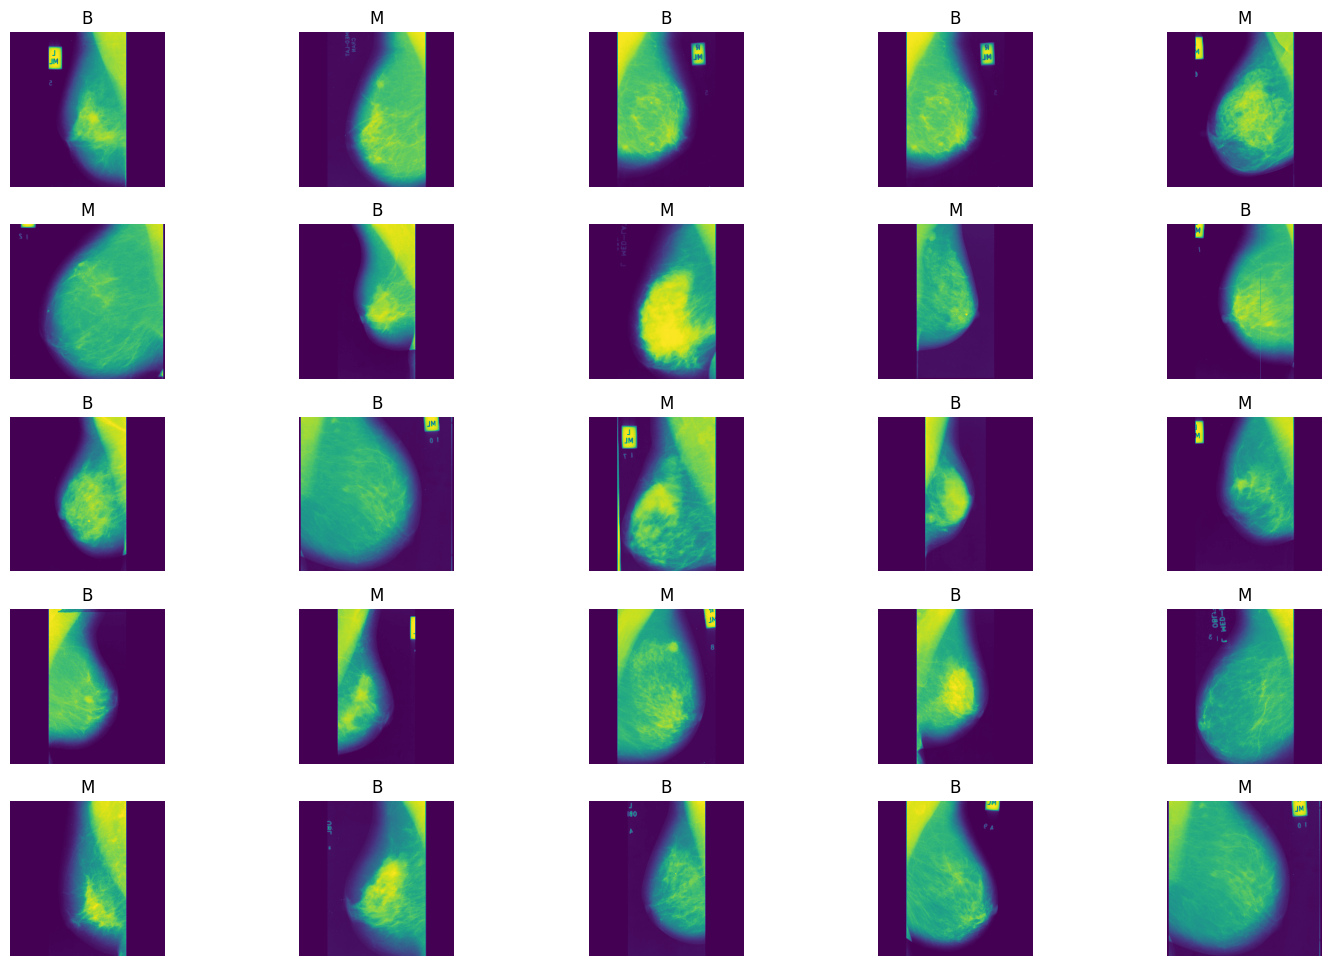

In [ ]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label) - 1) # Subtract 1 to ensure valid indices
        ax = plt.subplot(5, 5, i+1)

        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

In [ ]:
img_path = []
last_label = []
for i in range(len(img_name)):

    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [ ]:
last_label = np.array(last_label)
img_path = np.array(img_path)

In [ ]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(35136, 8784, 35136, 8784)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
x_train.shape

(35136, 224, 224)

In [ ]:
x_test.shape

(8784, 224, 224)

In [ ]:
(a,b,c)=x_train.shape # (35136, 224, 224)
x_train = np.reshape(x_train, (a, b, c, 1)) # 1 for gray scale
(a, b, c)=x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

# Assuming your data is already prepared and loaded into x_train, x_test, y_train, y_test as grayscale images
# Ensure x_train and x_test have the shape (number of samples, height, width, channels)

# Example reshaping if needed:
# (a,b,c) = x_train.shape  # (35136, 224, 224)
# x_train = np.reshape(x_train, (a, b, c, 1))  # 1 for grayscale

# (a, b, c) = x_test.shape
# x_test = np.reshape(x_test, (a, b, c, 1))


In [ ]:
# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer to feed into fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
!pip install keras
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)



Epoch 1/10
1097/1098 [============================>.] - ETA: 0s - loss: 1.3992 - accuracy: 0.5548
Epoch 1: val_accuracy improved from -inf to 0.58015, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1098/1098 [==============================] - 61s 47ms/step - loss: 1.3985 - accuracy: 0.5547 - val_loss: 0.6683 - val_accuracy: 0.5801
Epoch 2/10
1098/1098 [==============================] - ETA: 0s - loss: 0.6097 - accuracy: 0.6312
Epoch 2: val_accuracy improved from 0.58015 to 0.73270, saving model to best_model.h5
1098/1098 [==============================] - 51s 46ms/step - loss: 0.6097 - accuracy: 0.6312 - val_loss: 0.4780 - val_accuracy: 0.7327
Epoch 3/10
1098/1098 [==============================] - ETA: 0s - loss: 0.3726 - accuracy: 0.8169
Epoch 3: val_accuracy improved from 0.73270 to 0.88957, saving model to best_model.h5
1098/1098 [==============================] - 50s 45ms/step - loss: 0.3726 - accuracy: 0.8169 - val_loss: 0.2395 - val_accuracy: 0.8896
Epoch 4/10
1097/1098 [============================>.] - ETA: 0s - loss: 0.2021 - accuracy: 0.9160
Epoch 4: val_accuracy improved from 0.88957 to 0.94718, saving model to best_model.h5
1098/1098 [==============================] 

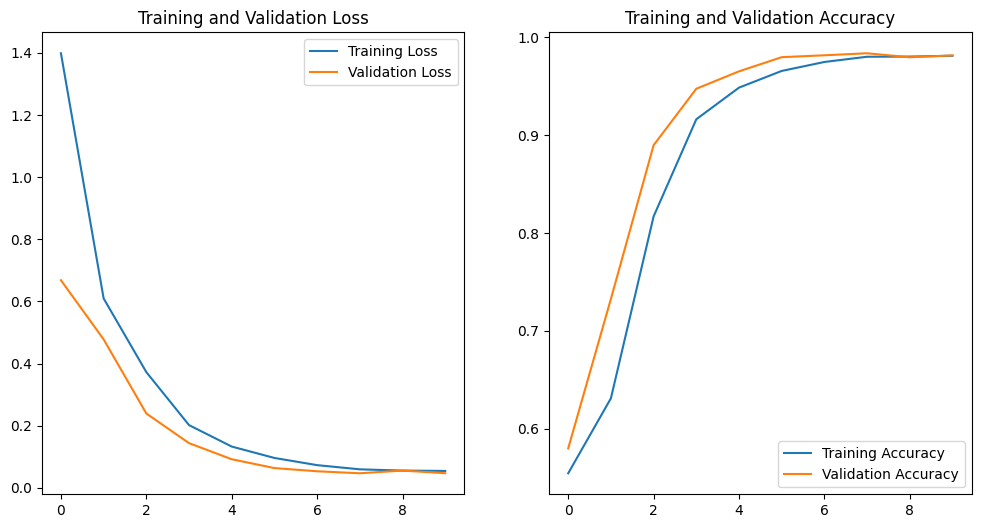

In [ ]:
# Fit the model and store training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()